In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("ECS 260 Tracking - Sheet1.csv")

In [6]:
df.describe()

,Prompt,LOC Before,LOC After,Radon Score ( Out of 100),Comments,Unnamed: 17,Unnamed: 18,Unnamed: 20
count,206.000000,242.000000,241.000000,42.000000,0.0,0.0,0.0,0.0
mean,1.155340,376.727273,234.435685,61.564524,NaN,NaN,NaN,NaN
std,0.363111,397.541918,248.775177,20.494242,NaN,NaN,NaN,NaN
min,1.000000,44.000000,0.000000,30.440000,NaN,NaN,NaN,NaN
25%,1.000000,125.000000,97.000000,44.912500,NaN,NaN,NaN,NaN
50%,1.000000,247.000000,143.000000,59.860000,NaN,NaN,NaN,NaN
75%,1.000000,462.000000,292.000000,73.730000,NaN,NaN,NaN,NaN
max,2.000000,2239.000000,2163.000000,100.000000,NaN,NaN,NaN,NaN


In [7]:
df.head()

,Repo,File Name,Test File,LLM Model Used,Prompt,Done By,PR,Passing Tests after,Execution Time before,Execution Time After,...,Test Case Coverage %,Radon Score ( Out of 100),Radon Score(Out of 100) Measures Readability,Comments,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unique test files,Unnamed: 20,Unique Repositories
0,https://github.com/scrapy/scrapy,contracts/__init__.py,test_contracts.py,Claude 3.5 Sonnet,NaN,Abdel,https://github.com/scrapy/scrapy/pull/6667/files,7/14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,contracts/__init__.py,NaN,https://github.com/scrapy/scrapy
1,NaN,NaN,NaN,GPT 4o,NaN,Abdel,https://github.com/scrapy/scrapy/pull/6668/files,14/14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,utils/url.py,test_utils_url.py,Claude 3.5 Sonnet,NaN,Abdel,https://github.com/scrapy/scrapy/pull/6669/files,75/78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,utils/url.py,NaN,https://github.com/se2p/pynguin?utm_source=cha...
3,NaN,NaN,NaN,GPT 4o,NaN,Abdel,https://github.com/scrapy/scrapy/pull/6670/files,78/78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tyepesystem.py,NaN,https://github.com/sharp1230/pymor/tree/cd773f...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cali.py,NaN,https://github.com/tokuhirom/jawiki-kana-kanji...


In [8]:
df.shape

(282, 22)

In [9]:
df = df.dropna(axis="rows", how="all") #remove all empty entries

In [10]:
len(df)

263

In [11]:

print(df['LOC Before'].mean())

376.72727272727275


In [12]:
print("NaN values in 'Prompt' before replacement:", df["Prompt"].isna().sum())
df["Prompt"] = df["Prompt"].fillna(1) #All empty prompt field will be replaced by 1 as default prompt
print("NaN values in 'Prompt' after replacement:", df["Prompt"].isna().sum())

NaN values in 'Prompt' before replacement: 57
NaN values in 'Prompt' after replacement: 0


In [13]:
file_names = df["File Name"].dropna().str.strip()
unique_count = file_names.nunique()
unique_count

75

In [14]:
df['File Name'] = df['File Name'].ffill()
df['Test File'] = df['Test File'].ffill()
print(df["File Name"].isna().sum())
print(df["Test File"].isna().sum())

0
0


In [15]:
df.drop(df[df["LLM Model Used"] == "Gemini 2.0 Flash"].index) # Exclude Gemini Processing

,Repo,File Name,Test File,LLM Model Used,Prompt,Done By,PR,Passing Tests after,Execution Time before,Execution Time After,...,Test Case Coverage %,Radon Score ( Out of 100),Radon Score(Out of 100) Measures Readability,Comments,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unique test files,Unnamed: 20,Unique Repositories
0,https://github.com/scrapy/scrapy,contracts/__init__.py,test_contracts.py,Claude 3.5 Sonnet,1.0,Abdel,https://github.com/scrapy/scrapy/pull/6667/files,7/14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,contracts/__init__.py,NaN,https://github.com/scrapy/scrapy
1,NaN,contracts/__init__.py,test_contracts.py,GPT 4o,1.0,Abdel,https://github.com/scrapy/scrapy/pull/6668/files,14/14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,utils/url.py,test_utils_url.py,Claude 3.5 Sonnet,1.0,Abdel,https://github.com/scrapy/scrapy/pull/6669/files,75/78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,utils/url.py,NaN,https://github.com/se2p/pynguin?utm_source=cha...
3,NaN,utils/url.py,test_utils_url.py,GPT 4o,1.0,Abdel,https://github.com/scrapy/scrapy/pull/6670/files,78/78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tyepesystem.py,NaN,https://github.com/sharp1230/pymor/tree/cd773f...
4,NaN,utils/url.py,test_utils_url.py,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cali.py,NaN,https://github.com/tokuhirom/jawiki-kana-kanji...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,NaN,lib/ansible/playbook/helpers.py,test/units/playbook/test_helpers.py,Deepseek,1.0,Sankalp,https://github.com/sankalp112kashyap/ansible/p...,27/27,0.23,0.22,...,100%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,NaN,containers.py,test_containers.py,claude,1.0,Abdel,https://github.com/Textualize/rich/pull/3667,4/4,0.05,0.05,...,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279,NaN,containers.py,test_containers.py,4o,1.0,Abdel,https://github.com/Textualize/rich/pull/3669,3/4,0.05,0.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,NaN,containers.py,test_containers.py,ds,1.0,Abdel,https://github.com/Textualize/rich/pull/3668,3/4,0.05,0.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
print(df['LLM Model Used'].unique())

['Claude 3.5 Sonnet' 'GPT 4o' nan 'CPT 4o' 'Gemini 2.0 Flash' 'Deepseek'
 'Claude 3.5' 'Claude Sonnet 3.5' 'GPT4o' 'Claude' '4o' 'gpt 4o' 'claude'
 'Caude' 'deepseek' 'ds' 'claude 3.5 sonnet' 'Chatgpt 4o']


In [17]:
model_mapping = {
    'GPT 4o': 'GPT-4o',
    'CPT 4o': 'GPT-4o',
    'Chatgpt 4o': 'GPT-4o',
    'GPT4o': 'GPT-4o',
    'gpt 4o': 'GPT-4o',
    '4o': 'GPT-4o',
    'Claude 3.5 Sonnet': 'Claude-3.5',
    'Claude Sonnet 3.5': 'Claude-3.5',
    'claude 3.5 sonnet': 'Claude-3.5',
    'claude 3.5': 'Claude-3.5',
    'claude': 'Claude-3.5',
    'Claude': 'Claude-3.5',
    'Caude':'Claude-3.5',
    'Claude 3.5': 'Claude-3.5',
    'Deepseek': 'Deepseek',
    'deepseek': 'Deepseek',
    'ds': 'Deepseek'
}

df['LLM_Model'] = df['LLM Model Used'].map(model_mapping)

In [18]:
df['Passing_Ratio'] = df['Passing Tests after'].apply(
    lambda x: (
        float(parts[0]) / float(parts[1])
        if isinstance(x, str) and '/' in x and len(parts := x.strip().split('/')) == 2
        and parts[0].strip().isdigit() and parts[1].strip().isdigit()
        else np.nan
    )
)
df['Passing_Percentage']=df['Passing_Ratio']*100

for col in ['Execution Time before', 'Execution Time After']:
    df[col] = df[col].apply(
        lambda x: float(str(x).replace('s', '').strip())
        if pd.notna(x) and str(x).replace('s', '').replace('.', '', 1).isdigit()
        else np.nan
    )

# Calculate base metrics
df['Execution_Time_Change'] = np.where(
    df['Execution Time before'] != 0,
    (df['Execution Time After'] - df['Execution Time before']) / df['Execution Time before'],
    np.nan
)
df['Execution_Time_Change_Percentage'] = df['Execution_Time_Change'] * 100

df['LOC_Reduction'] = np.where(
    df['LOC Before'] != 0,
    (df['LOC Before'] - df['LOC After']) / df['LOC Before'],
    np.nan
)
df['LOC_Reduction_Percentage'] = df['LOC_Reduction'] * 100

# Create separate columns for each prompt value
# Assuming 'prompt' is the column that contains values 1 and 2
for prompt_value in [1, 2]:
    # Create mask for rows with this prompt value
    mask = df['Prompt'] == prompt_value

    # Create new columns with prompt-specific values
    df[f'Passing_Ratio_Prompt_{prompt_value}'] = np.where(mask, df['Passing_Ratio'], np.nan)
    df[f'Execution_Time_Change_Prompt_{prompt_value}'] = np.where(mask, df['Execution_Time_Change'], np.nan)
    df[f'LOC_Reduction_Prompt_{prompt_value}'] = np.where(mask, df['LOC_Reduction'], np.nan)
    df[f'Passing_Percentage_Prompt_{prompt_value}'] = np.where(mask, df['Passing_Percentage'], np.nan)
    df[f'Execution_Time_Change_Percentage_Prompt_{prompt_value}'] = np.where(mask, df['Execution_Time_Change_Percentage'], np.nan)
    df[f'LOC_Reduction_Percentage_Prompt_{prompt_value}'] = np.where(mask, df['LOC_Reduction_Percentage'], np.nan)

In [19]:
print(df.columns)

Index(['Repo', 'File Name', 'Test File', 'LLM Model Used', 'Prompt', 'Done By',
       'PR', 'Passing Tests after', 'Execution Time before',
       'Execution Time After', 'LOC Before', 'LOC After',
       'Test Case Coverage  %', 'Radon Score ( Out of 100)',
       'Radon Score(Out of 100) Measures Readability', 'Comments',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unique test files',
       'Unnamed: 20', 'Unique Repositories', 'LLM_Model', 'Passing_Ratio',
       'Passing_Percentage', 'Execution_Time_Change',
       'Execution_Time_Change_Percentage', 'LOC_Reduction',
       'LOC_Reduction_Percentage', 'Passing_Ratio_Prompt_1',
       'Execution_Time_Change_Prompt_1', 'LOC_Reduction_Prompt_1',
       'Passing_Percentage_Prompt_1',
       'Execution_Time_Change_Percentage_Prompt_1',
       'LOC_Reduction_Percentage_Prompt_1', 'Passing_Ratio_Prompt_2',
       'Execution_Time_Change_Prompt_2', 'LOC_Reduction_Prompt_2',
       'Passing_Percentage_Prompt_2',
       'Execution_

In [20]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filter out outliers
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Columns to apply outlier removal
outlier_cols = ['Passing_Ratio_Prompt_1', 'Execution_Time_Change_Prompt_1', 'LOC_Reduction_Prompt_1']

# Remove outliers
df_cleaned = remove_outliers_iqr(df, outlier_cols)

In [21]:
print(df.shape)
print(df_cleaned.shape)
print("Total Files")
file_names = df["File Name"].dropna().str.strip()
unique_count = file_names.nunique()
print(unique_count)
print("Number of Files after outlier removal")
file_names = df_cleaned["File Name"].dropna().str.strip()
unique_count = file_names.nunique()
print(unique_count)

(263, 41)
(138, 41)
Total Files
75
Number of Files after outlier removal
60


In [22]:
def analyze_model_performance(df):
  model_stats = df.groupby('LLM_Model').agg({
          'Passing_Percentage_Prompt_1': ['mean', 'median', 'count'],
          'LOC_Reduction_Percentage_Prompt_1': ['mean', 'median'],
          'Execution_Time_Change_Percentage_Prompt_1': ['mean', 'median']
      }).reset_index()

  print(model_stats)
analyze_model_performance(df)
print("After removing outliers")
analyze_model_performance(df_cleaned)

    LLM_Model Passing_Percentage_Prompt_1               \
                                     mean median count   
0  Claude-3.5                   87.228117  100.0    67   
1    Deepseek                   80.281239  100.0    56   
2      GPT-4o                   83.691228  100.0    71   

  LOC_Reduction_Percentage_Prompt_1             \
                               mean     median   
0                         27.203858  23.311569   
1                         26.509669  24.686386   
2                         30.891585  28.571429   

  Execution_Time_Change_Percentage_Prompt_1            
                                       mean    median  
0                                 27.408825 -5.202703  
1                                 18.131582  1.565170  
2                                 63.910323  0.000000  
After removing outliers
    LLM_Model Passing_Percentage_Prompt_1               \
                                     mean median count   
0  Claude-3.5                   96.814

In [23]:
def analyze_prompt_effect(df):
  prompt_df = df[pd.notna(df['Prompt'])]

  prompt_stats = prompt_df.groupby(['LLM_Model', 'Prompt']).agg({
      'Passing_Percentage': ['mean', 'count'],
      'LOC_Reduction_Percentage': 'mean',
      'Execution_Time_Change_Percentage': 'mean'
  }).reset_index()

  print(prompt_stats)
analyze_prompt_effect(df)

    LLM_Model Prompt Passing_Percentage       LOC_Reduction_Percentage  \
                                   mean count                     mean   
0  Claude-3.5    1.0          87.228117    67                27.203858   
1    Deepseek    1.0          80.281239    56                26.509669   
2      GPT-4o    1.0          83.691228    71                30.891585   
3      GPT-4o    2.0          84.760296    32                28.733162   

  Execution_Time_Change_Percentage  
                              mean  
0                        27.408825  
1                        18.131582  
2                        63.910323  
3                        66.273900  


In [24]:
print(df['LLM_Model'].unique())

['Claude-3.5' 'GPT-4o' nan 'Deepseek']


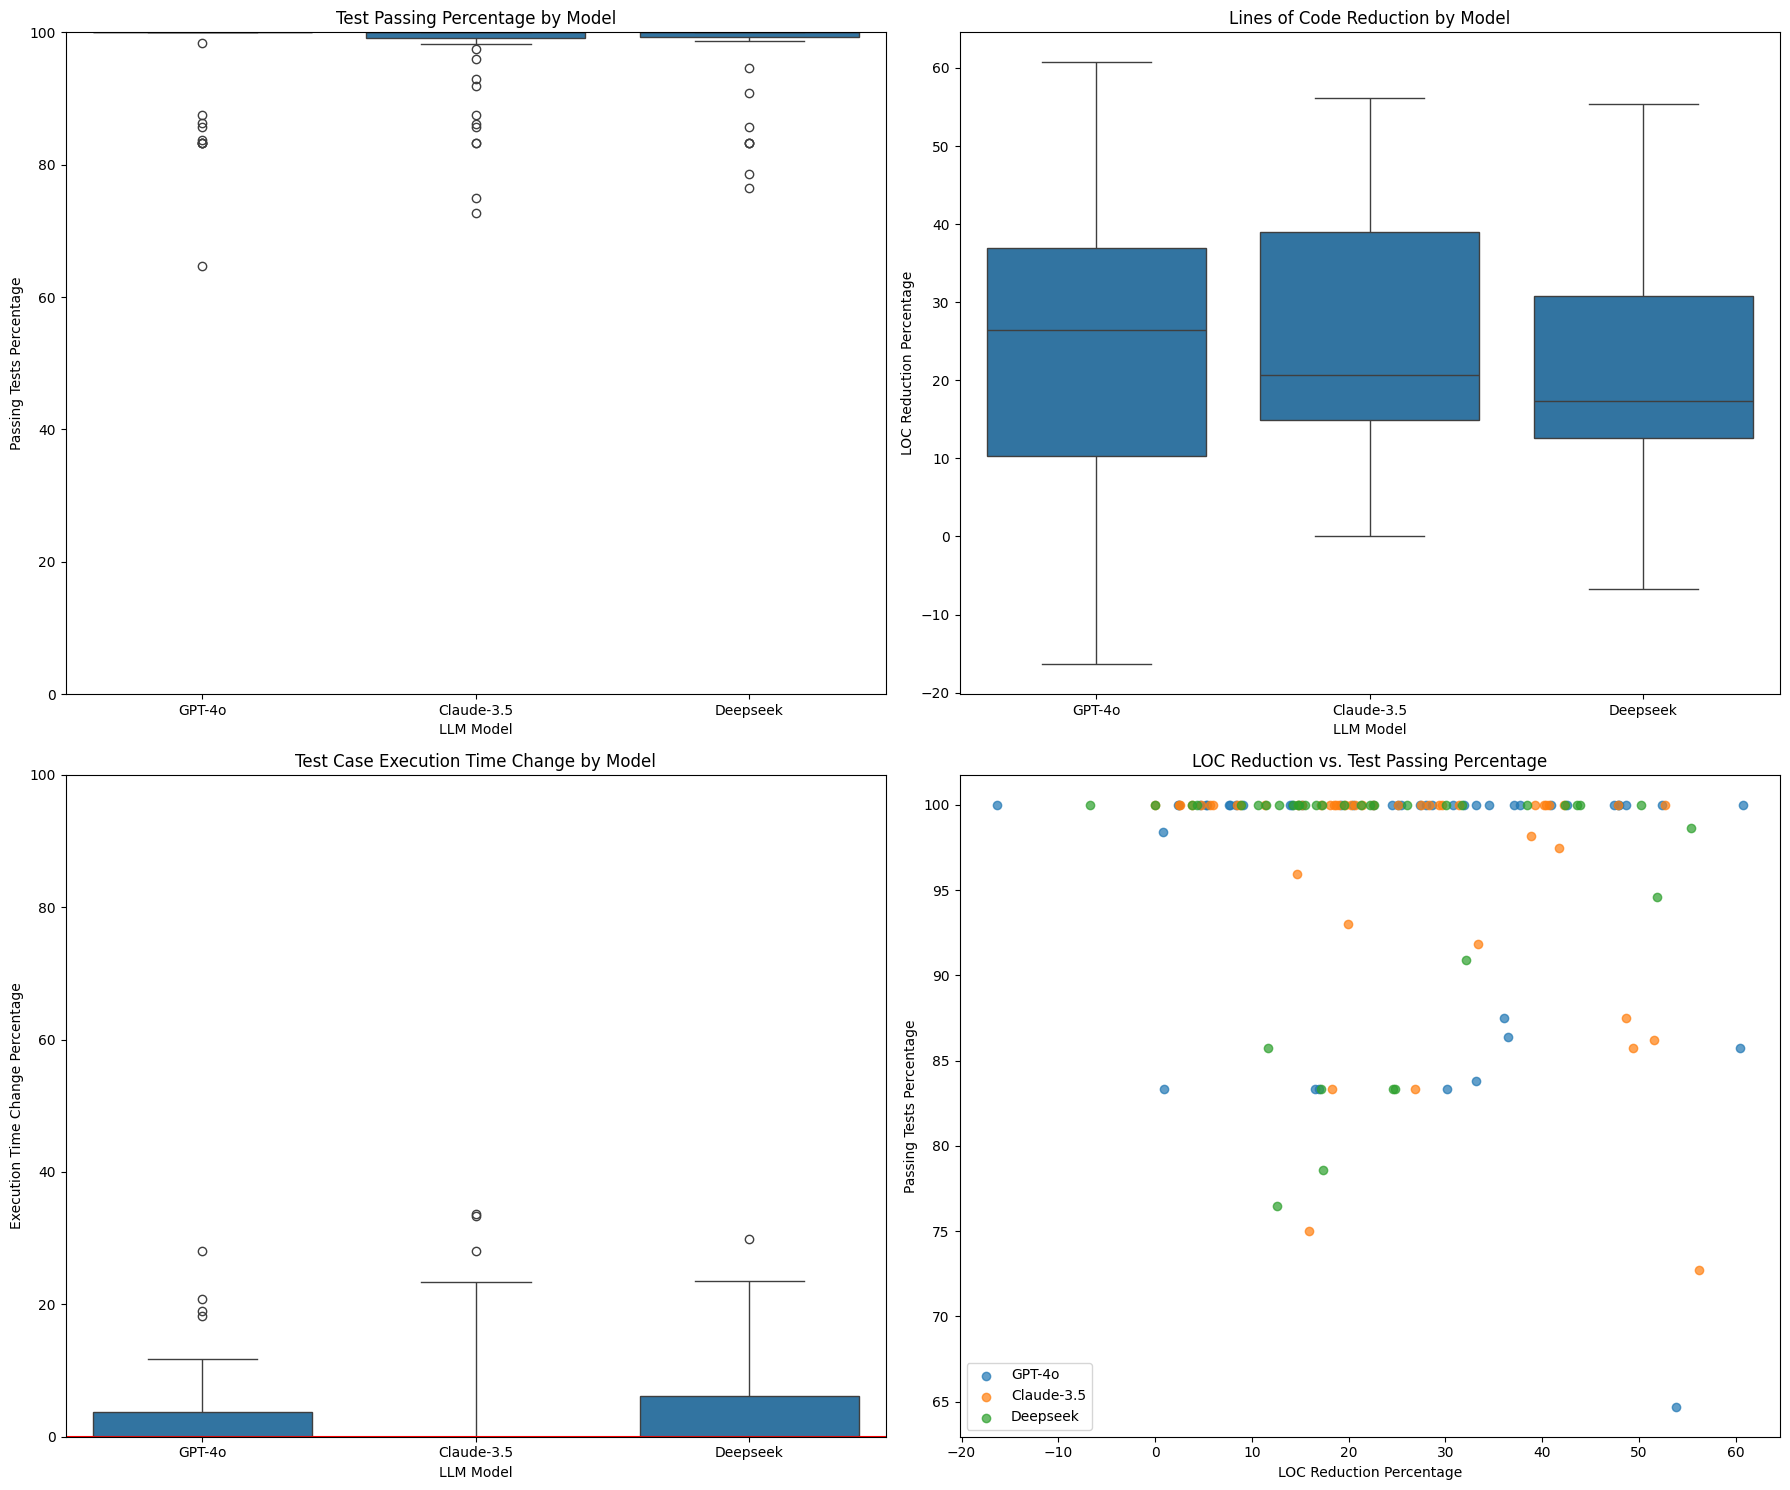

In [25]:
def visualize_model_comparison(df):
    """Create visualizations comparing different models"""

    # Create a figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(18, 15))

    # 1. Test Passing Ratio by Model
    sns.boxplot(x='LLM_Model', y='Passing_Percentage_Prompt_1', data=df, ax=axes[0, 0])
    axes[0, 0].set_title('Test Passing Percentage by Model')
    axes[0, 0].set_ylim(0, 100)
    axes[0, 0].set_xlabel('LLM Model')
    axes[0, 0].set_ylabel('Passing Tests Percentage')

    # 2. LOC Reduction by Model
    sns.boxplot(x='LLM_Model', y='LOC_Reduction_Percentage_Prompt_1', data=df, ax=axes[0, 1])
    axes[0, 1].set_title('Lines of Code Reduction by Model')
    axes[0, 1].set_xlabel('LLM Model')
    axes[0, 1].set_ylabel('LOC Reduction Percentage')

    # 3. Execution Time Change by Model
    sns.boxplot(x='LLM_Model', y='Execution_Time_Change_Percentage_Prompt_1', data=df, ax=axes[1, 0])
    axes[1, 0].set_title('Test Case Execution Time Change by Model')
    axes[1, 0].set_ylim(0, 100)  # Limit to better show the distribution
    axes[1, 0].axhline(y=0, color='r', linestyle='-')
    axes[1, 0].set_xlabel('LLM Model')
    axes[1, 0].set_ylabel('Execution Time Change Percentage')

    # 4. Scatter plot of LOC Reduction vs. Passing Ratio
    loc_data = df[['LLM_Model', 'LOC Before', 'LOC After']].dropna(subset=['LLM_Model'])

    model_colors = {
        'GPT-4o': 'blue',
        'Claude-3.5': 'green',
        'Deepseek': 'purple'
    }

    handles = []
    labels = []

    for model in df['LLM_Model'].unique():
        if model is None or (isinstance(model, float) and math.isnan(model)):
         continue
        model_df = df[df['LLM_Model'] == model]
        axes[1, 1].scatter(
            model_df['LOC_Reduction_Percentage_Prompt_1'],
            model_df['Passing_Percentage'],
            label=model,
            alpha=0.7
        )

    axes[1, 1].set_title('LOC Reduction vs. Test Passing Percentage')
    axes[1, 1].set_xlabel('LOC Reduction Percentage')
    axes[1, 1].set_ylabel('Passing Tests Percentage')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()
    #plt.style.use('seaborn-whitegrid')
    plt.savefig('model_comparison.png', dpi=300)
    plt.close()


visualize_model_comparison(df_cleaned)

C:\Users\devan\AppData\Local\Temp\ipykernel_36992\2095360127.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LLM_Model', y='mean', data=model_stats, ax=ax, palette='Blues')


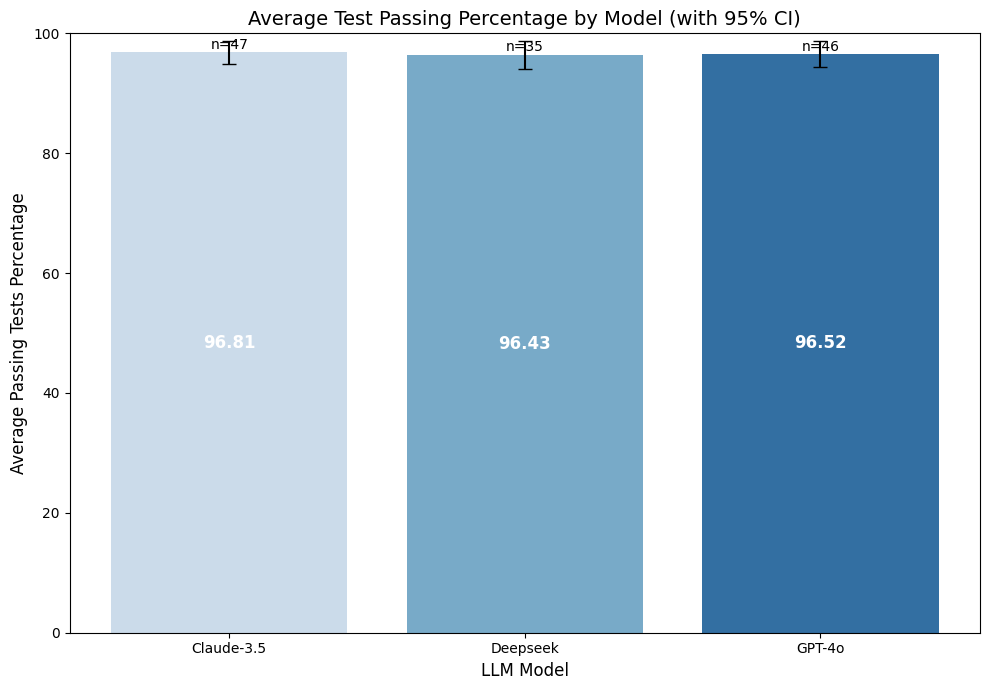

In [26]:
def visualize_test_passing_comparison(df):
    # Filter to only include rows with valid passing ratio data
    plot_df = df.dropna(subset=['Passing_Percentage_Prompt_1'])

    # Create a figure with just one visualization
    fig, ax = plt.subplots(figsize=(10, 7))

    # Calculate statistics by model
    model_stats = plot_df.groupby('LLM_Model')['Passing_Percentage_Prompt_1'].agg(['mean', 'std', 'count']).reset_index()

    # Calculate confidence intervals (95%)
    model_stats['ci'] = model_stats.apply(
        lambda x: 1.96 * x['std'] / np.sqrt(x['count']) if x['count'] > 1 else 0,
        axis=1
    )

    # Plot simple bar chart
    sns.barplot(x='LLM_Model', y='mean', data=model_stats, ax=ax, palette='Blues')

    # Add error bars manually
    for i, row in model_stats.iterrows():
        ax.errorbar(i, row['mean'], yerr=row['ci'], fmt='none', color='black', capsize=5)

    # Add data labels on bars
    for i, row in model_stats.iterrows():
        ax.text(i, row['mean'] / 2, f"{row['mean']:.2f}",
               ha='center', va='center', fontsize=12, fontweight='bold', color='white')

    # Add sample size on top of bars
    for i, row in model_stats.iterrows():
        ax.text(i, row['mean'] + 0.05, f"n={row['count']}",
               ha='center', va='bottom', fontsize=10)

    ax.set_title('Average Test Passing Percentage by Model (with 95% CI)', fontsize=14)
    ax.set_ylim(0, 100)
    ax.set_xlabel('LLM Model', fontsize=12)
    ax.set_ylabel('Average Passing Tests Percentage', fontsize=12)

    plt.tight_layout()
    plt.savefig('test_passing_comparison.png', dpi=300)
    plt.show()
visualize_test_passing_comparison(df_cleaned)

Minimum Coverage (per file): 50.00%
Maximum Coverage (per file): 100.00%
Average Coverage (per file): 96.90%


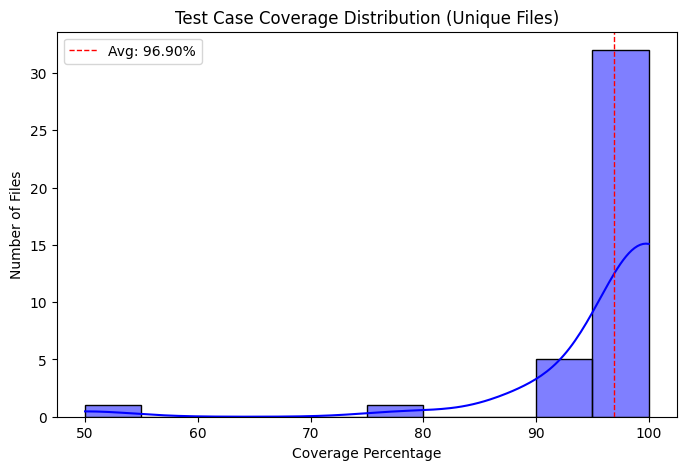

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_test_coverage(df):
    # Ensure 'files' column exists


    # Clean 'Test Case Coverage  %' column
    df['Test Case Coverage  %'] = df['Test Case Coverage  %'].astype(str).str.rstrip('%')  # Remove '%'
    df['Test Case Coverage  %'] = pd.to_numeric(df['Test Case Coverage  %'], errors='coerce')  # Convert to float
    df.dropna(subset=['Test Case Coverage  %'], inplace=True)  # Remove NaN values

    # Aggregate by unique files (taking average per file)
    file_coverage = df.groupby('File Name')['Test Case Coverage  %'].mean()

    # Calculate min, max, and average across unique files
    min_coverage = file_coverage.min()
    max_coverage = file_coverage.max()
    avg_coverage = file_coverage.mean()

    # Print results
    print(f"Minimum Coverage (per file): {min_coverage:.2f}%")
    print(f"Maximum Coverage (per file): {max_coverage:.2f}%")
    print(f"Average Coverage (per file): {avg_coverage:.2f}%")

    # Plot simple histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(file_coverage, bins=10, kde=True, color='blue')
    plt.axvline(avg_coverage, color='red', linestyle='dashed', linewidth=1, label=f'Avg: {avg_coverage:.2f}%')
    plt.title('Test Case Coverage Distribution (Unique Files)')
    plt.xlabel('Coverage Percentage')
    plt.ylabel('Number of Files')
    plt.legend()
    plt.show()

# Example: Running the function
analyze_test_coverage(df_cleaned)


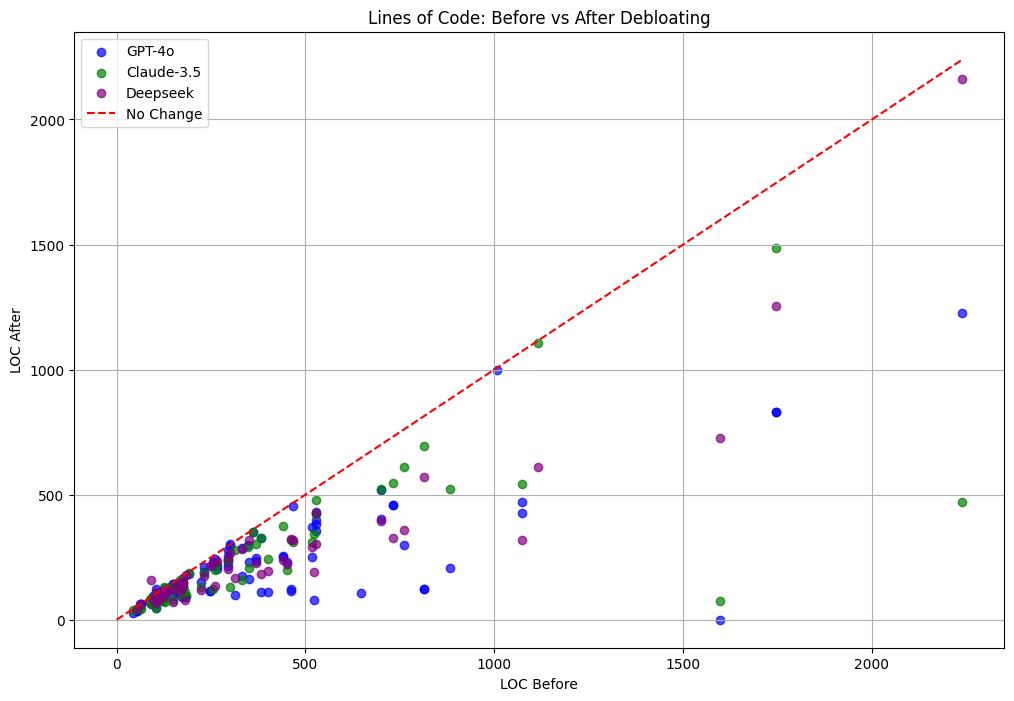

In [28]:
# Create additional plots

    # 5. LOC Before vs After by Model
plt.figure(figsize=(12, 8))
loc_data = df[['LLM_Model', 'LOC Before', 'LOC After']].dropna()

model_colors = {
    'GPT-4o': 'blue',
    'Claude-3.5': 'green',
    'Deepseek': 'purple'
}

for model in loc_data['LLM_Model'].unique():
    model_df = loc_data[loc_data['LLM_Model'] == model].dropna()
    plt.scatter(
        model_df['LOC Before'],
        model_df['LOC After'],
        color=model_colors.get(model, 'gray'),
        label=model,
        alpha=0.7
    )

# Add diagonal line (y=x)
max_loc = max(loc_data['LOC Before'].max(), loc_data['LOC After'].max())
plt.plot([0, max_loc], [0, max_loc], 'r--', label='No Change')

plt.title('Lines of Code: Before vs After Debloating')
plt.xlabel('LOC Before')
plt.ylabel('LOC After')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('loc_before_after.png', dpi=300)
plt.close()

C:\Users\devan\AppData\Local\Temp\ipykernel_36992\3961620742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prompt_df['Prompt'] = prompt_df['Prompt'].astype(str)


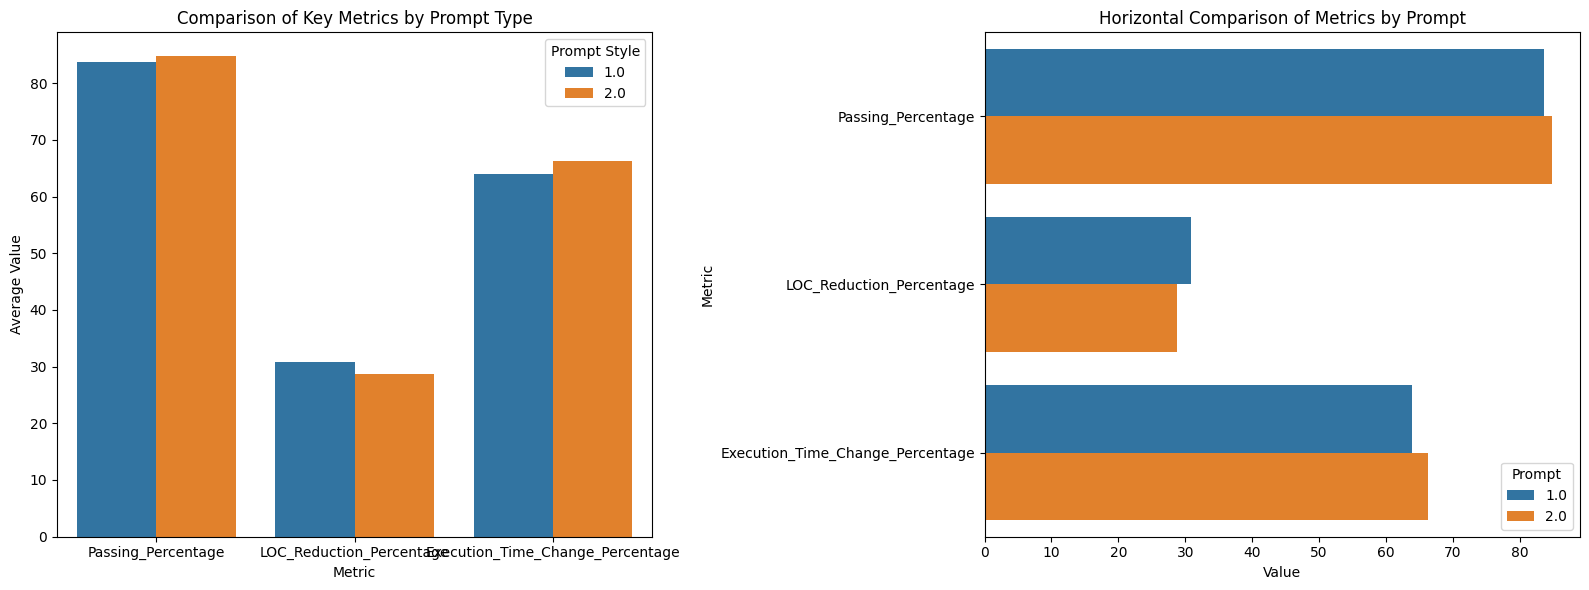

In [29]:
def visualize_prompt_effect(df):
    """Create visualizations for prompt effect analysis with simplified comparison"""

    # Filter data to include only GPT-4o with prompt information
    prompt_df = df[(df['LLM_Model'] == 'GPT-4o') & pd.notna(df['Prompt'])]

    if len(prompt_df) > 5:  # Only create viz if we have enough data
        # Convert prompt values to categorical for better labeling
        prompt_df['Prompt'] = prompt_df['Prompt'].astype(str)

        # Create a figure with just two visualizations
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

        # Define metrics to analyze
        metrics = ['Passing_Percentage', 'LOC_Reduction_Percentage', 'Execution_Time_Change_Percentage']
        metrics_df = prompt_df.groupby('Prompt')[metrics].mean().reset_index()

        # Reshape data for grouped bar chart
        metrics_df_long = pd.melt(metrics_df, id_vars=['Prompt'],
                                 value_vars=metrics,
                                 var_name='Metric', value_name='Value')

        # 1. Vertical grouped bar chart
        sns.barplot(x='Metric', y='Value', hue='Prompt', data=metrics_df_long, ax=ax1)
        ax1.set_title('Comparison of Key Metrics by Prompt Type')
        ax1.set_xlabel('Metric')
        ax1.set_ylabel('Average Value')
        ax1.legend(title='Prompt Style')

        # 2. Horizontal bar chart for direct comparison
        sns.barplot(y='Metric', x='Value', hue='Prompt', data=metrics_df_long,
                   orient='h', ax=ax2)
        ax2.set_title('Horizontal Comparison of Metrics by Prompt')
        ax2.set_xlabel('Value')
        ax2.set_ylabel('Metric')

        plt.tight_layout()
        plt.savefig('prompt_effect_comparison.png', dpi=300)
        plt.show()
        plt.close()
visualize_prompt_effect(df)

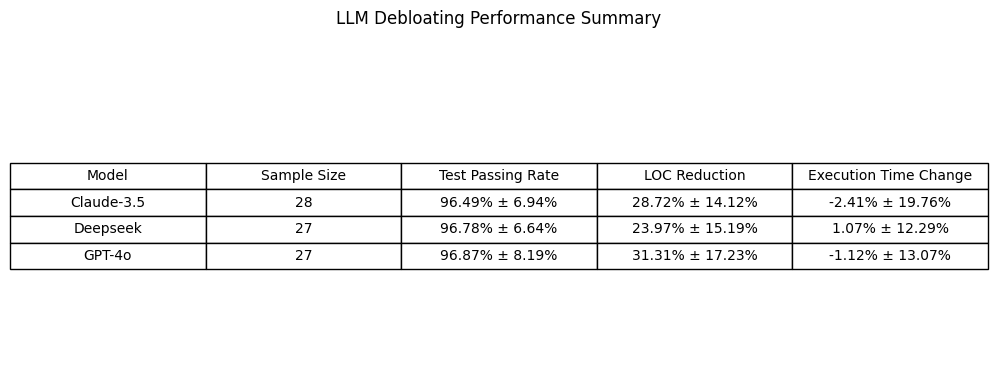

In [30]:
def create_summary_table(df):
    """Create a summary table of key metrics"""

    # Prepare summary statistics by model
    summary = df.groupby('LLM_Model').agg({
        'Passing_Ratio': ['mean', 'std', 'count'],
        'LOC_Reduction': ['mean', 'std'],
        'Execution_Time_Change': ['mean', 'std']
    })

    # Format for better readability
    summary_formatted = pd.DataFrame({
        'Model': summary.index,
        'Sample Size': summary[('Passing_Ratio', 'count')].values,
        'Test Passing Rate': [f"{v:.2%} ± {e:.2%}" for v, e in
                              zip(summary[('Passing_Ratio', 'mean')], summary[('Passing_Ratio', 'std')])],
        'LOC Reduction': [f"{v:.2%} ± {e:.2%}" for v, e in
                          zip(summary[('LOC_Reduction', 'mean')], summary[('LOC_Reduction', 'std')])],
        'Execution Time Change': [f"{v:.2%} ± {e:.2%}" for v, e in
                                  zip(summary[('Execution_Time_Change', 'mean')],
                                      summary[('Execution_Time_Change', 'std')])]
    })

    # Create a figure
    fig, ax = plt.figure(figsize=(10, 4)), plt.gca()
    ax.axis('off')

    # Create table
    table = ax.table(
        cellText=summary_formatted.values,
        colLabels=summary_formatted.columns,
        loc='center',
        cellLoc='center'
    )

    # Modify table appearance
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)

    # Save the figure
    plt.title('LLM Debloating Performance Summary', pad=20)
    plt.tight_layout()
    plt.savefig('performance_summary_table.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    return summary_formatted

summary_table = create_summary_table(df_cleaned)


Starting analysis of LLM code debloating data...
    LLM_Model Passing_Percentage_Prompt_1               \
                                     mean median count   
0  Claude-3.5                   96.485571  100.0    28   
1    Deepseek                   96.777921  100.0    27   
2      GPT-4o                   96.869405  100.0    27   

  LOC_Reduction_Percentage_Prompt_1             \
                               mean     median   
0                         28.718169  27.844720   
1                         23.973255  17.288136   
2                         31.309137  28.571429   

  Execution_Time_Change_Percentage_Prompt_1            
                                       mean    median  
0                                 -2.413343 -2.899160  
1                                  1.072475 -0.083195  
2                                 -1.117606  0.000000  
    LLM_Model Prompt Passing_Percentage       LOC_Reduction_Percentage  \
                                   mean count          

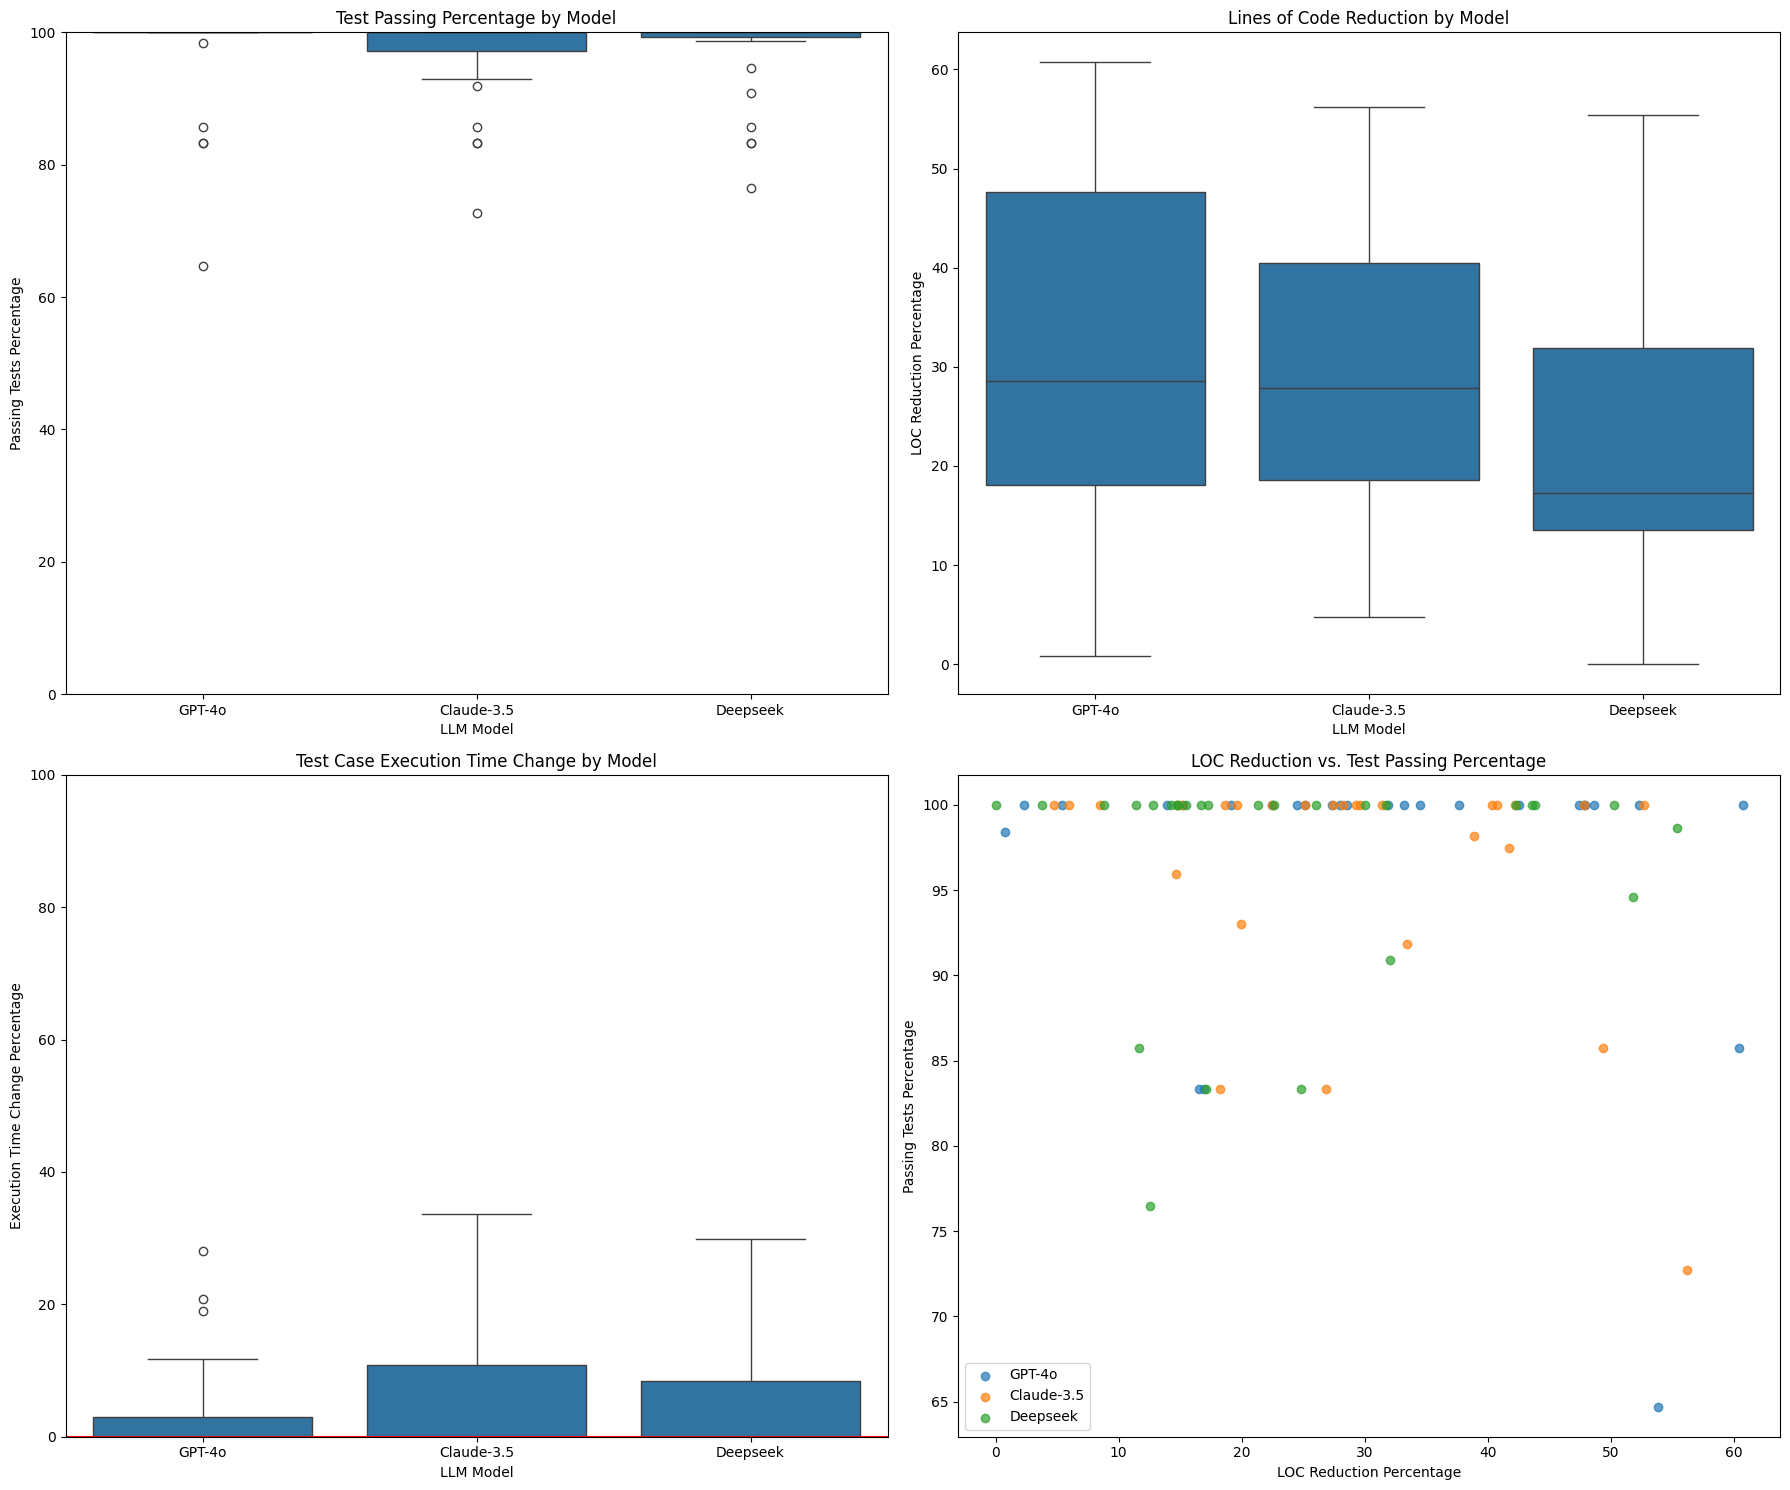

C:\Users\devan\AppData\Local\Temp\ipykernel_36992\3961620742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prompt_df['Prompt'] = prompt_df['Prompt'].astype(str)


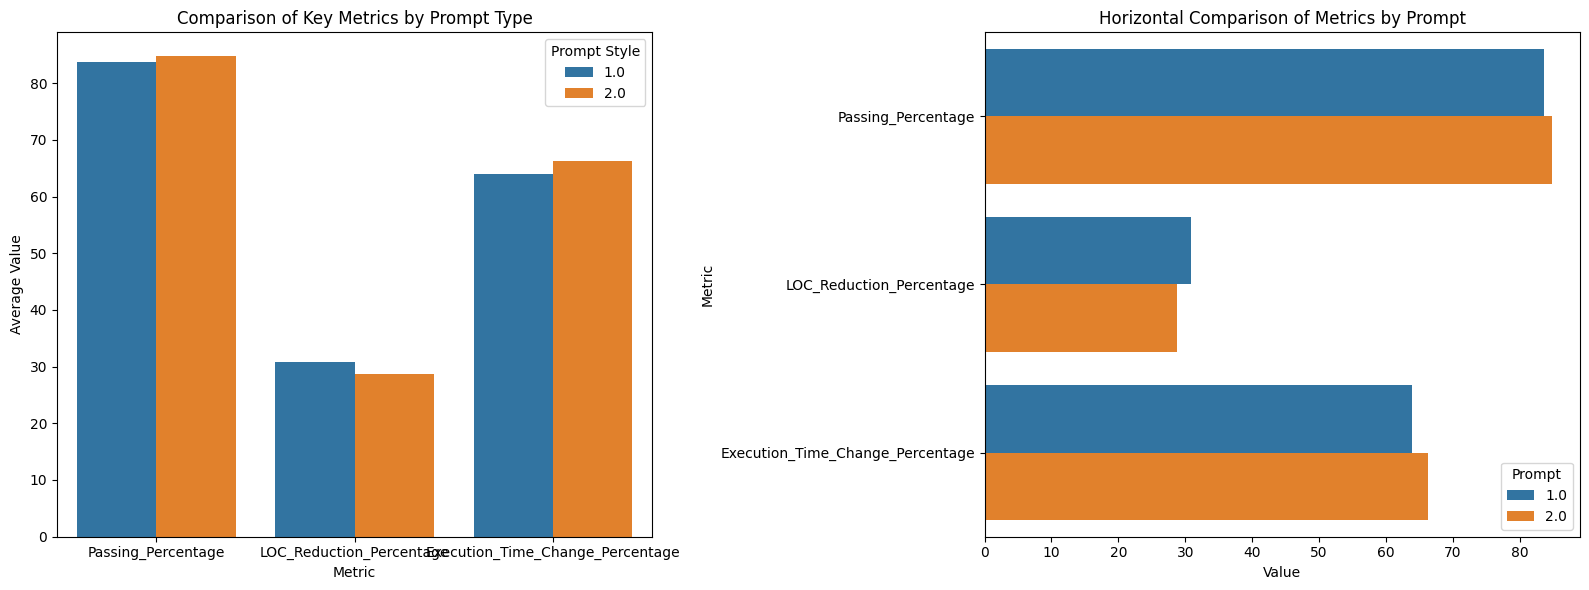

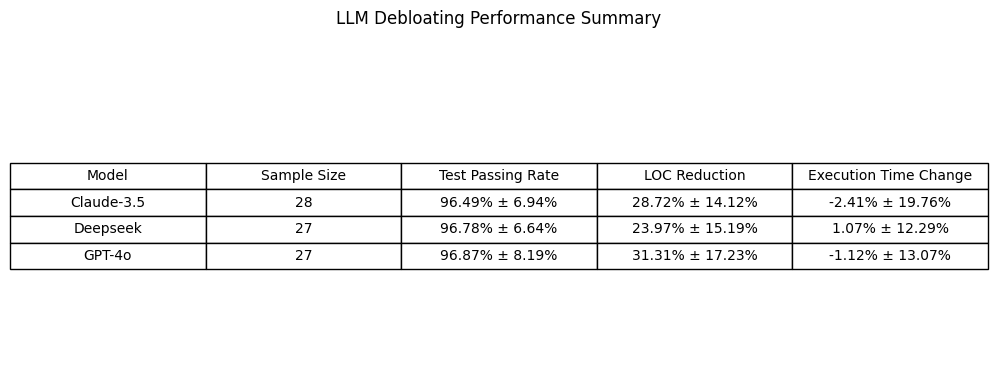


Analysis complete. Visualizations saved.
        Model  Sample Size Test Passing Rate    LOC Reduction  \
0  Claude-3.5           28    96.49% ± 6.94%  28.72% ± 14.12%   
1    Deepseek           27    96.78% ± 6.64%  23.97% ± 15.19%   
2      GPT-4o           27    96.87% ± 8.19%  31.31% ± 17.23%   

  Execution Time Change  
0       -2.41% ± 19.76%  
1        1.07% ± 12.29%  
2       -1.12% ± 13.07%  

===== RESEARCH QUESTION INSIGHTS =====
RQ1: Average LOC reduction across all models: 26.81%
RQ2: Average test passing ratio across all models: 97.02%
RQ3: Effect of prompt style on test passing ratio:
Prompt
1.0    0.846933
2.0    0.847603
Name: Passing_Ratio, dtype: float64

RQ4: Model comparison for LOC reduction (higher is better):
LLM_Model
GPT-4o        0.313091
Claude-3.5    0.287182
Deepseek      0.239733
Name: LOC_Reduction, dtype: float64

RQ4: Model comparison for test passing ratio (higher is better):
LLM_Model
GPT-4o        0.968694
Deepseek      0.967779
Claude-3.5    0.96

In [31]:
def main():
    print("Starting analysis of LLM code debloating data...")

    # Run analysis
    model_stats = analyze_model_performance(df_cleaned)
    prompt_stats = analyze_prompt_effect(df)

    # Create visualizations
    visualize_model_comparison(df_cleaned)
    visualize_prompt_effect(df)
    summary_table = create_summary_table(df_cleaned)

    print("\nAnalysis complete. Visualizations saved.")
    print(summary_table)

    # Calculate key metrics to address research questions
    print("\n===== RESEARCH QUESTION INSIGHTS =====")

    # RQ1: Can LLMs detect and eliminate software bloat while preserving code readability?
    avg_loc_reduction = df_cleaned['LOC_Reduction'].mean()
    print(f"RQ1: Average LOC reduction across all models: {avg_loc_reduction:.2%}")

    # RQ2: How reliably do LLM-optimized code maintain functional correctness?
    avg_passing_ratio = df_cleaned['Passing_Ratio'].mean()
    print(f"RQ2: Average test passing ratio across all models: {avg_passing_ratio:.2%}")

    # RQ3: Effect of prompt engineering (if available)
    if 'Prompt' in df.columns and df['Prompt'].notna().any():
        prompt_effect = df.groupby('Prompt')['Passing_Ratio'].mean()
        print("RQ3: Effect of prompt style on test passing ratio:")
        print(prompt_effect)

    # RQ4: Comparative performance of different LLM architectures
    model_loc_reduction = df_cleaned.groupby('LLM_Model')['LOC_Reduction'].mean().sort_values(ascending=False)
    model_passing = df_cleaned.groupby('LLM_Model')['Passing_Ratio'].mean().sort_values(ascending=False)

    print("\nRQ4: Model comparison for LOC reduction (higher is better):")
    print(model_loc_reduction)

    print("\nRQ4: Model comparison for test passing ratio (higher is better):")
    print(model_passing)

# Run the main function
if __name__ == "__main__":
    main()